In [1]:
## Poisson Equation
# Load  FEM Packages
from fenics import *
from mshr import *
# Plotting Libraries
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")

In [2]:
# Function Definition
def PlotFields(u_field, e_field):
    """
    PlotFields(u_field, e_field)
    """
    fig = plt.figure(figsize = (14,10))                       # Set the resolution
    plt.subplot(121)
    figU = plot(u_field)
    plt.colorbar(figU, shrink=0.5)
    plt.title("Potential Field")
    plt.subplot(122)
    figE = plot(e_field)
    plt.colorbar(figE, shrink = 0.5)
    plt.title("Electric Field")
    plt.show()

In [3]:
# Create mesh and define function space
mesh = UnitSquareMesh(50, 50)
V = FunctionSpace(mesh, 'P', 1)

In [4]:
# Define classes for the boundaries
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0.0)

class Right(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 1.0)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 0.0)

class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 1.0)

# Initialize sub-domain instances
left = Left()
right = Right()
bottom = Bottom()
top = Top()

# Define values for the boundary conditions
bc_left = DirichletBC(V, Constant(1.0), left)
bc_right = DirichletBC(V, Constant(1.0), right)
bc_bottom = DirichletBC(V, Constant(0.5), bottom)
bc_top = DirichletBC(V, Constant(1.0), top)

# Collect boundary conditions
bc = [bc_left, bc_right, bc_bottom, bc_top]

In [5]:
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)
solve(a == L, u, bc)


Solving linear variational problem.


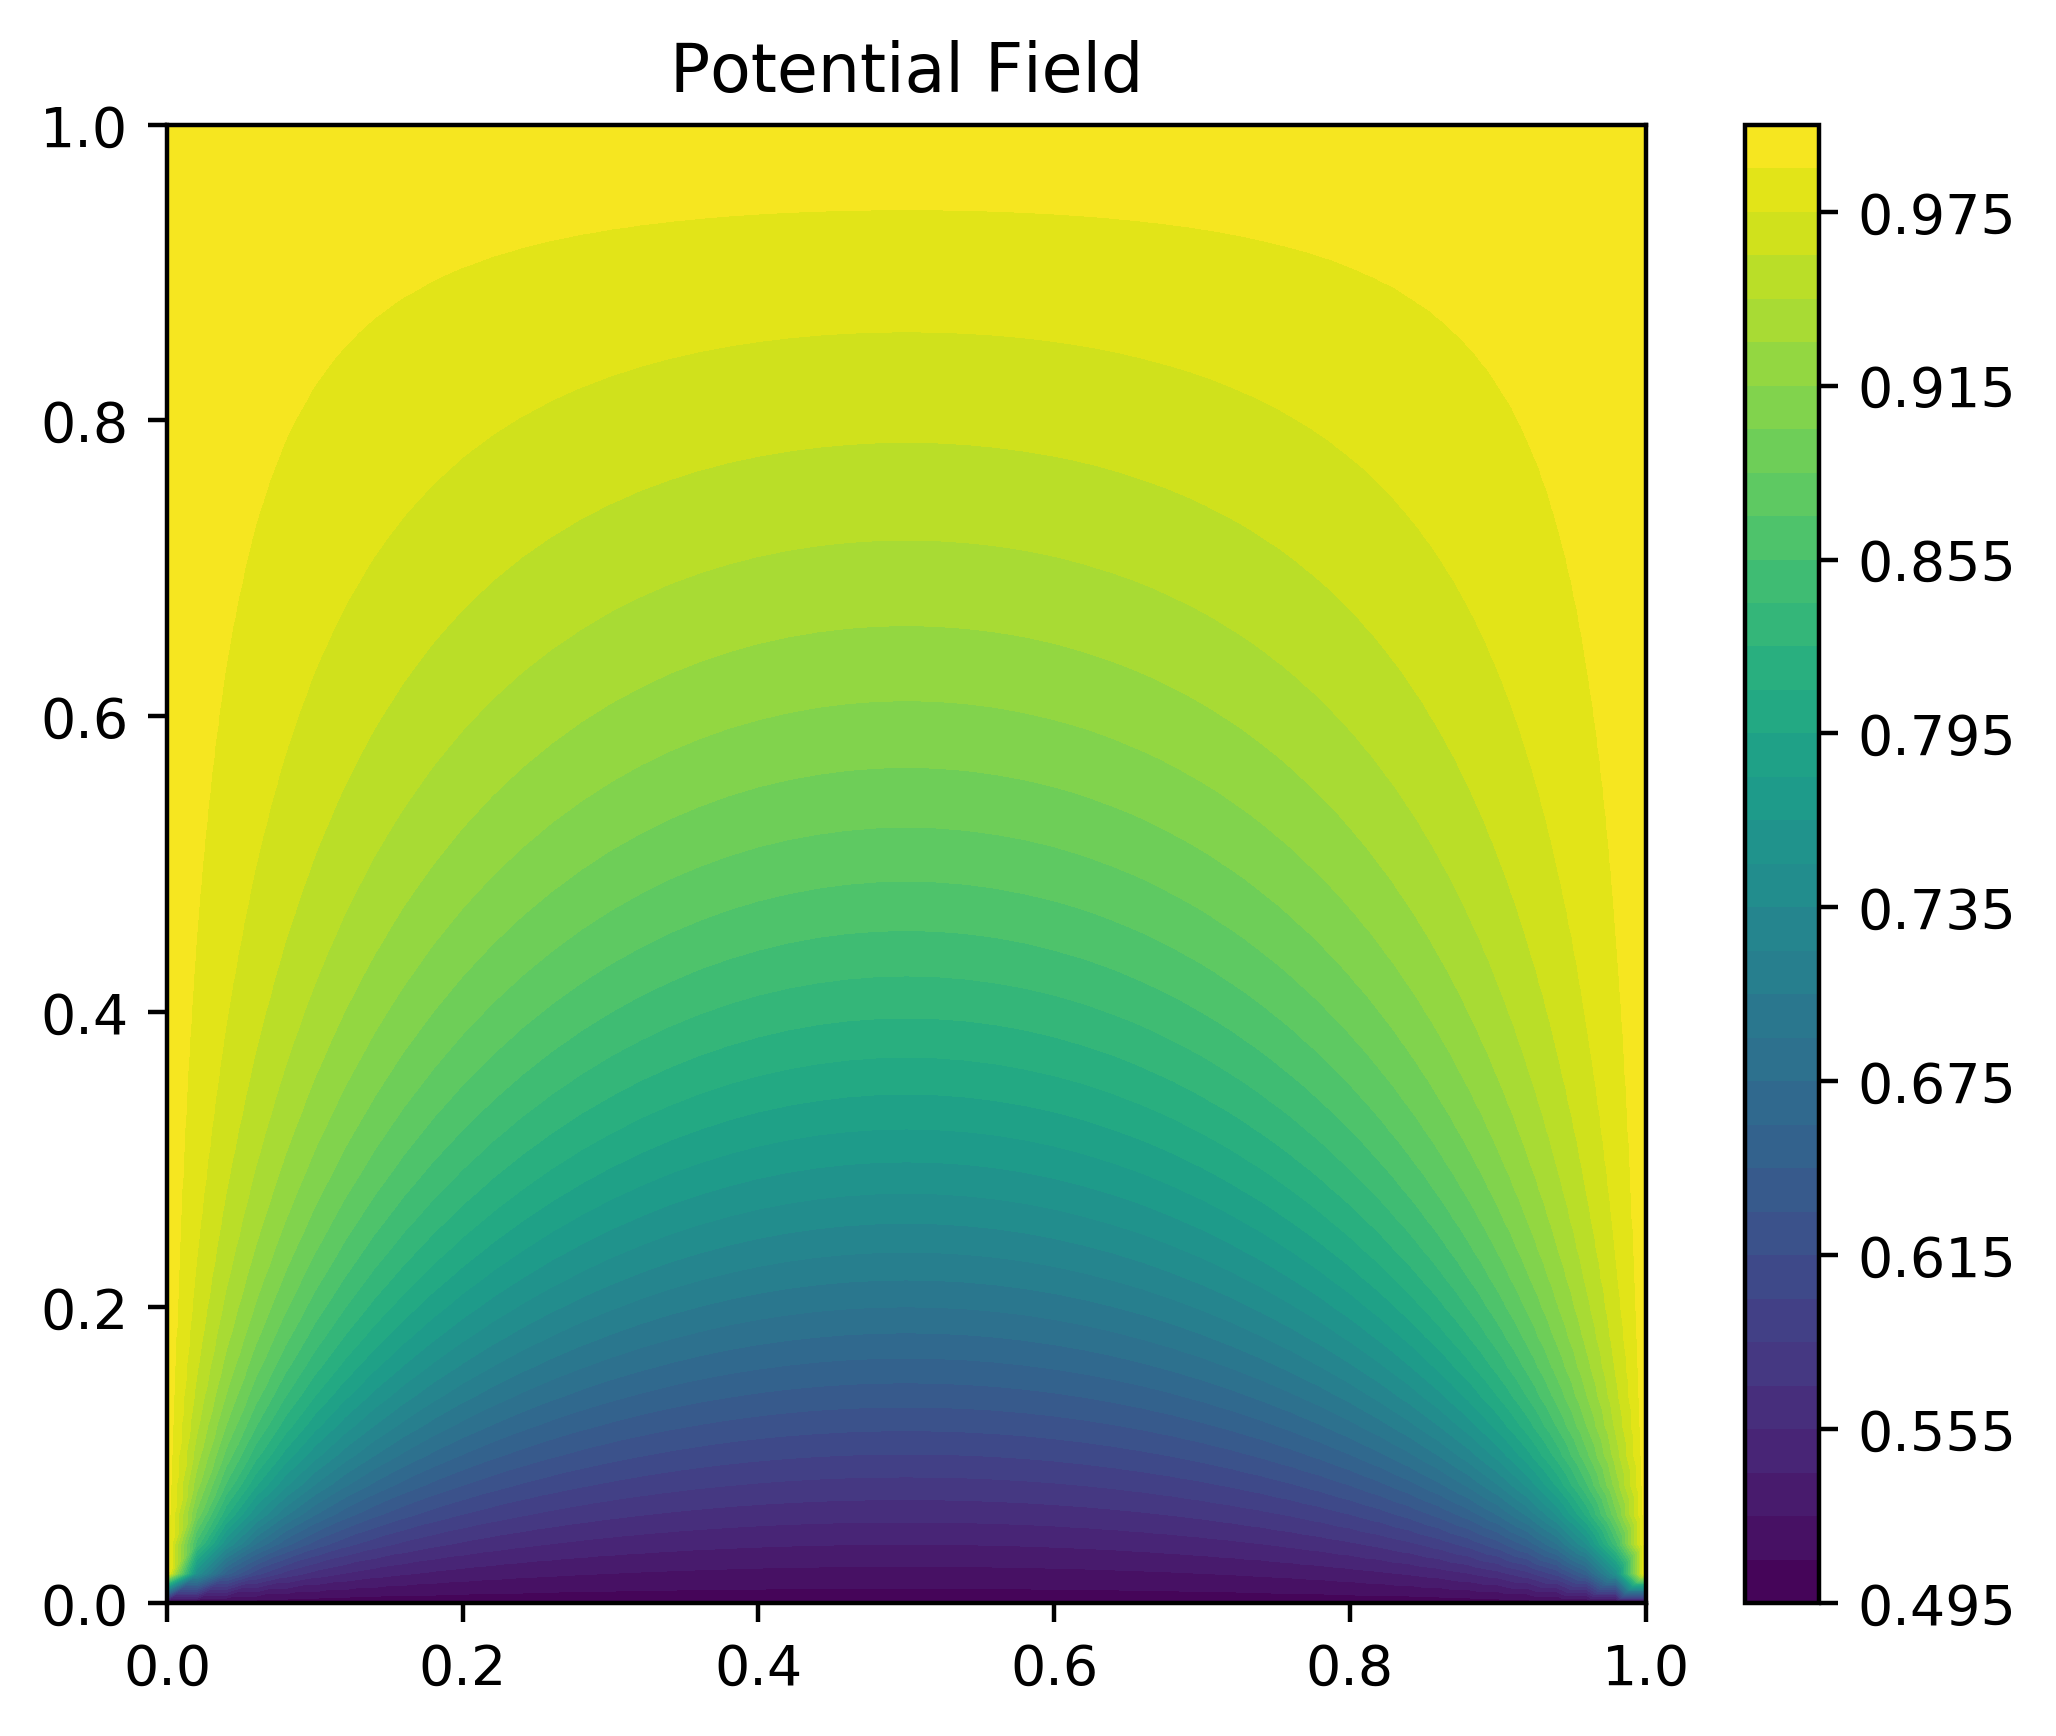

In [6]:
## Plotting the solution.
plt.figure(dpi=400)                       # Set the resolution
plot(u, title = 'Potential Field')              # Set the title
plt.colorbar(plot(u)) # Add a colorbar
plt.show()

Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


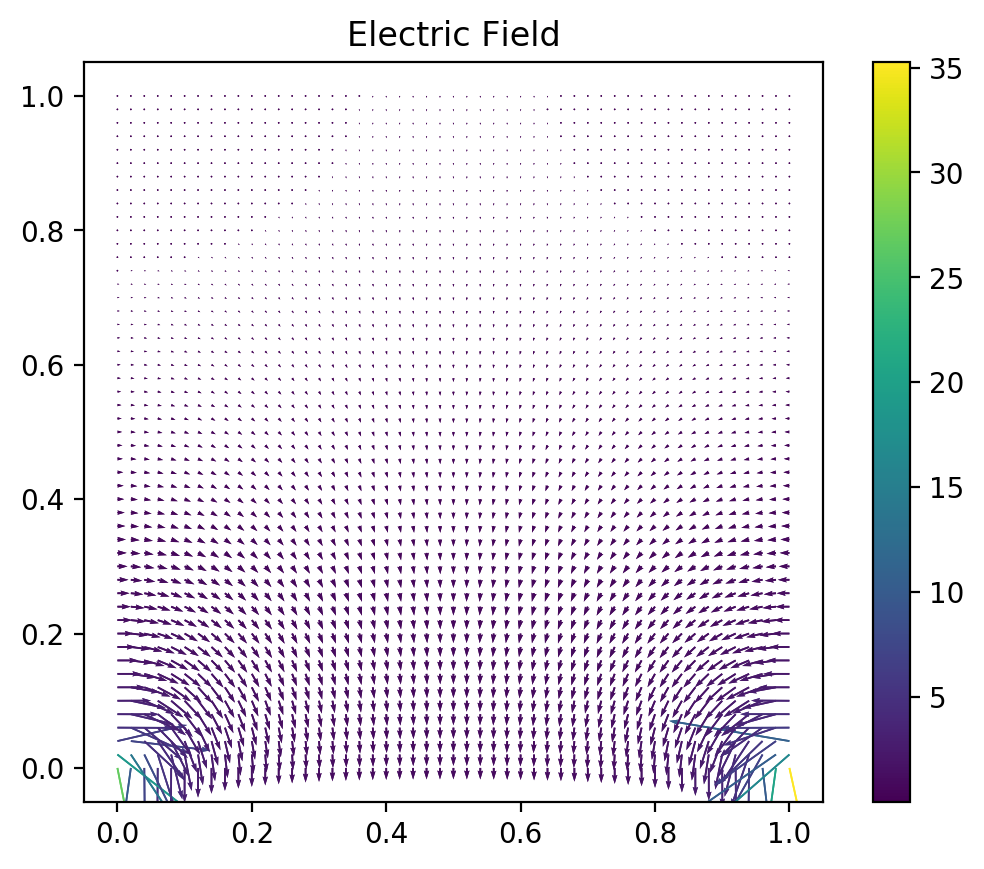

In [7]:
## Plotting the electric field.
e_field = - grad(u)
plt.figure(dpi=200)                       # Set the resolution
plot(e_field, title = 'Electric Field')              # Set the title
plt.colorbar(plot(e_field)) # Add a colorbar
plt.show()                  # Set the title

Object cannot be plotted directly, projecting to piecewise linears.


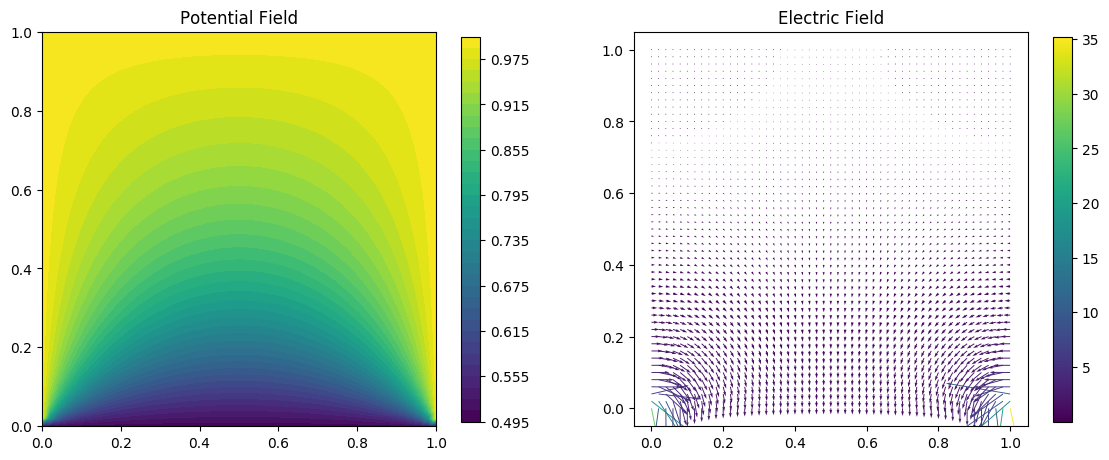

In [8]:
PlotFields(u, e_field)